In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import cv2, os, tensorflow, keras
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from google.colab.patches import cv2_imshow
import albumentations as A
from scipy.io import savemat
import scipy.io as sio
import pickle

## **APPLIED AUGMENTATION TECHNIQUES**

In [ ]:
transform = A.Compose([
    A.Resize(224, 224),
   #A.RandomBrightnessContrast(p=1)
   #A.OneOf([A.HueSaturationValue(p=1), A.RGBShift(p=0.7)], p=1),
   #A.Sharpen(alpha=(0.4, 0.5), lightness=(0.8, 1.0), always_apply=True, p=0.7)
   #A.MultiplicativeNoise (multiplier=(0.8, 1.1), per_channel=True, elementwise=True, always_apply=True, p=0.1)
   #A.InvertImg(0.5)
   #A.VerticalFlip(0.5)
   ], keypoint_params=A.KeypointParams(format='xy'))

## **AUGMENTATION UPON IMAGES AND LABELLED FILES**

In [ ]:
trainImg='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/data/training/'
traingKP='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/labels/training/'
imgF=os.listdir(trainImg)
i=0
imgProcess=[]
kpProcess=[]
for img in imgF:
  try:
    imgR=cv2.imread(trainImg+img)
    test = sio.loadmat(traingKP+img+'.mat')
    keyPoint=list(test.values())[3]
    transform = A.Compose([A.Resize(128, 64), A.InvertImg(0.5)], keypoint_params=A.KeypointParams(format='xy', remove_invisible=True))
    transformed = transform(image=imgR, keypoints=keyPoint)
    transformed_image = transformed['image']
    transformed_keypoints = transformed['keypoints']
    outputIMG='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/Invert/IMG/'+'invert-'+img
    outputKP='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/Invert/KEYPOINT/'+'invert-'+img+'.mat'
    cv2.imwrite(outputIMG, transformed_image)
    keysdic = {"p2": transformed_keypoints}
    savemat(outputKP, keysdic)
  except:
    i+=1
    continue
print(f'Error Images:{i}')

[(29.794538361508454, 3.09538737124944), (41.695708712613786, 3.3246753246753245), (30.12743823146944, 6.821316614420063), (41.695708712613786, 7.337214509628303), (30.12743823146944, 7.623824451410658), (41.61248374512354, 8.025078369905955), (30.12743823146944, 11.86565158978952), (40.28088426527958, 12.266905508284818), (30.293888166449936, 13.069413345275414), (40.364109232769835, 13.069413345275414), (30.876462938881666, 16.96730855351545), (40.530559167750326, 17.540528437080162), (30.626788036410925, 18.0564263322884), (40.530559167750326, 18.801612180922525), (29.54486345903771, 22.068965517241377), (38.78283485045514, 23.444693237796685), (28.962288686605984, 23.78862516793551), (38.69960988296489, 25.107030900134347), (27.713914174252277, 28.66099417823556), (37.53446033810143, 30.036721898790862), (26.631989596879066, 30.094043887147336), (37.03511053315995, 31.183161665920284), (24.884265279583875, 35.88356471115092), (36.78543563068921, 37.25929243170622), (24.384915474642

## **TESTING THE AUGMENTED DATA**

In [ ]:
test = sio.loadmat(outputKP)
keyPoint=list(test.values())[3]
xk=keyPoint[:,0]
yk=keyPoint[:,1]

IMAGE SHAPE:(128, 64)


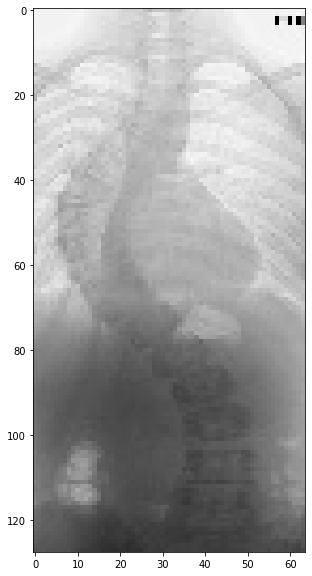

In [ ]:
plt.figure(figsize=(10,10))
imgR=cv2.imread(outputIMG)
imgG= cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
print(f'IMAGE SHAPE:{imgG.shape}')
plt.imshow(imgR)

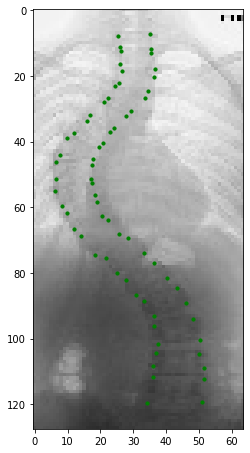

In [ ]:
from matplotlib import image
from matplotlib import pyplot as plt

plt.figure(figsize=(17,17))
plt.subplot(221)
plt.scatter(xk, yk, color="green", s=10)
plt.imshow(imgR)

## **SHIFTING AUGMENTED DATA TO NEW FOLDER**

In [ ]:
import shutil 
import os 
path='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/Mnoise/IMG/'
dst='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/ACombFile/IMG/'
for file1 in os.listdir(path):
  f=path+file1
  print(file1)
  shutil.copy(f, dst)


noise-sunhl-1th-10-Jan-2017-240 B AP.jpg
noise-sunhl-1th-10-Jan-2017-242 A AP.jpg
noise-sunhl-1th-11-Jan-2017-254 P AP.jpg
noise-sunhl-1th-11-Jan-2017-255 A AP.jpg
noise-sunhl-1th-11-Jan-2017-254 M AP.jpg
noise-sunhl-1th-11-Jan-2017-254 O AP.jpg
noise-sunhl-1th-11-Jan-2017-254 N AP.jpg
noise-sunhl-1th-11-Jan-2017-255 B AP.jpg
noise-sunhl-1th-10-Jan-2017-240 A AP.jpg
noise-sunhl-1th-10-Jan-2017-243 A AP.jpg
noise-sunhl-1th-10-Jan-2017-241 B AP.jpg
noise-sunhl-1th-10-Jan-2017-241 C AP.jpg
noise-sunhl-1th-10-Jan-2017-241 A AP.jpg
noise-sunhl-1th-11-Jan-2017-254 L AP.jpg
noise-sunhl-1th-09-Jan-2017-208 B AP.jpg
noise-sunhl-1th-09-Jan-2017-206 B AP.jpg
noise-sunhl-1th-09-Jan-2017-205 E AP.jpg
noise-sunhl-1th-09-Jan-2017-207 B AP.jpg
noise-sunhl-1th-09-Jan-2017-206 A AP.jpg
noise-sunhl-1th-09-Jan-2017-197 A AP.jpg
noise-sunhl-1th-09-Jan-2017-196 C AP.jpg
noise-sunhl-1th-09-Jan-2017-196 D AP.jpg
noise-sunhl-1th-09-Jan-2017-197 B AP.jpg
noise-sunhl-1th-09-Jan-2017-197 C AP.jpg
noise-sunhl-1th-

## **CHECKING THE AUGMENTED IMAGES NAME**

In [ ]:
ufile=[]
for f in file1:
  ff=f.split('-')[0]
  if ff not in ufile:
    ufile.append(ff)

print(ufile)

['bright', 'invert', 'srgb', 'sharp', 'vflip', 'noise']


## **CHECKING THE NUMBER OF AUGMENTED FILES PRESENT**

In [ ]:
img='/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/ACombFile/IMG/'
file1=os.listdir(img)
print(len(file1))

2880


## **DELETING UNWANTED FILE**

In [ ]:
outputFolder="/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/AugmentFiles/ACombFile/KEYPOINT/"
listimg=os.listdir(outputFolder)
removeImg=['Mnoise']
for img in listimg:
  imgN=img.split('-')[0]
  if imgN in removeImg:
    imgF=outputFolder+img
    os.remove(imgF)

In [ ]:
outputFolder="/content/drive/MyDrive/Colab Notebooks/scoliosis xray Single View/boostnet_labeldata/SmallAugmentFiles/Vflip/IMG/"
listimg=os.listdir(outputFolder)
for img in listimg:
  imgF=outputFolder+img
  os.remove(imgF)